## Bellman Optimality Equation solver
### MDP Formulation:
### $\mathcal{S} = \big\{(n_1, n_2): 0 \leq n_1, n_2 \leq M \big\}$
### $\mathcal{A} = [0,1]$
### Policy $\pi: \mathcal{S} \mapsto \mathcal{A}$ allocates the fraction of cores to type 1 jobs

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.optimize import fsolve, minimize
from scipy.integrate import quad
from scipy import linspace, meshgrid, arange, empty, concatenate, newaxis, shape
from collections import deque

In [2]:
import nbimporter
from important_functions import *

In [3]:
lam = 2
mu = 1
cores = 10
p1 = 0 # Bad Jobs
p2 = 1 # Good Jobs
alpha = 0.5
M = 10

pars = [lam, mu, cores, p1, p2, alpha, M]

In [4]:
# Scaling the transition rates

scale_1 = lam + mu*np.max([min(M, c)*speed_up(p1, c) + min(M, cores-c)*speed_up(p2, cores-c) for c in range(cores+1)])
scale_2 = lam + M*mu*np.max([speed_up(p1, c) + speed_up(p2, cores-c) for c in range(cores+1)])
scale_3 = lam + M*mu*(speed_up(p1, cores) + speed_up(p2, cores))

print(scale_1)
print(scale_2)
print(scale_3)

102.00000000000001
112.00000000000001
112.00000000000001


## Computing optimal actions given $\lambda, p_1, p_2, \alpha$

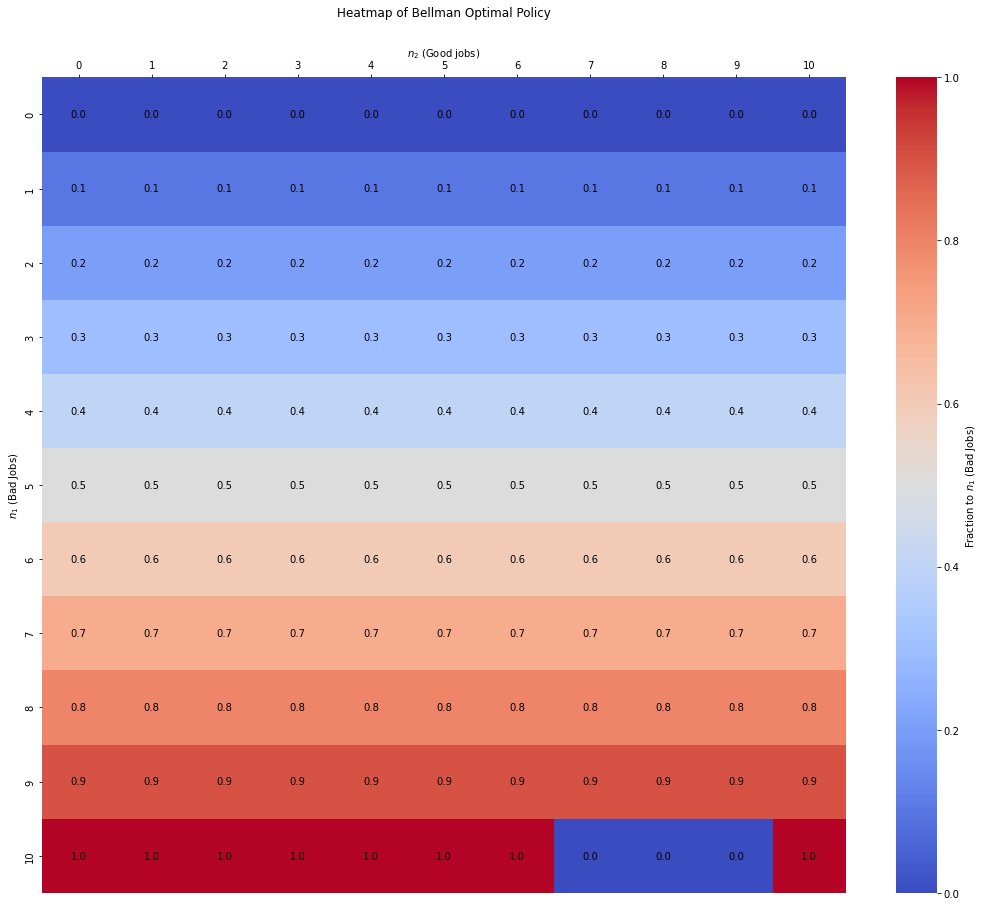

In [5]:
bellman_pi_optimal, bellman_relative_V_optimal, bellman_relative_Q_optimal = bellman_optimal_policy(pars)

# Testing
# print("Optimal actions are ")
# print("")
# print(np.matrix.round(bellman_pi_optimal,3))

# Policy 1 heatmap
fig, axes = plt.subplots(figsize=(18, 15))
heatmap = sns.heatmap(bellman_pi_optimal, ax=axes, cmap="coolwarm", annot=False, cbar=True)

# Move x-axis to top
axes.xaxis.set_ticks_position('top')
axes.xaxis.set_label_position('top')

# Grid coordinate labels
for i in range(bellman_pi_optimal.shape[0]):
    for j in range(bellman_pi_optimal.shape[1]):
        axes.text(j + 0.5, i + 0.5, f"{bellman_pi_optimal[i][j]}", ha='center', va='center', fontsize=10, color='black')

heatmap.collections[0].colorbar.set_label("Fraction to $n_1$ (Bad Jobs)")
axes.set_title("Heatmap of Bellman Optimal Policy", pad=30)
axes.set_xlabel("$n_2$ (Good jobs)")
axes.set_ylabel("$n_1$ (Bad Jobs)")
plt.show()

## Visualizing Q-values

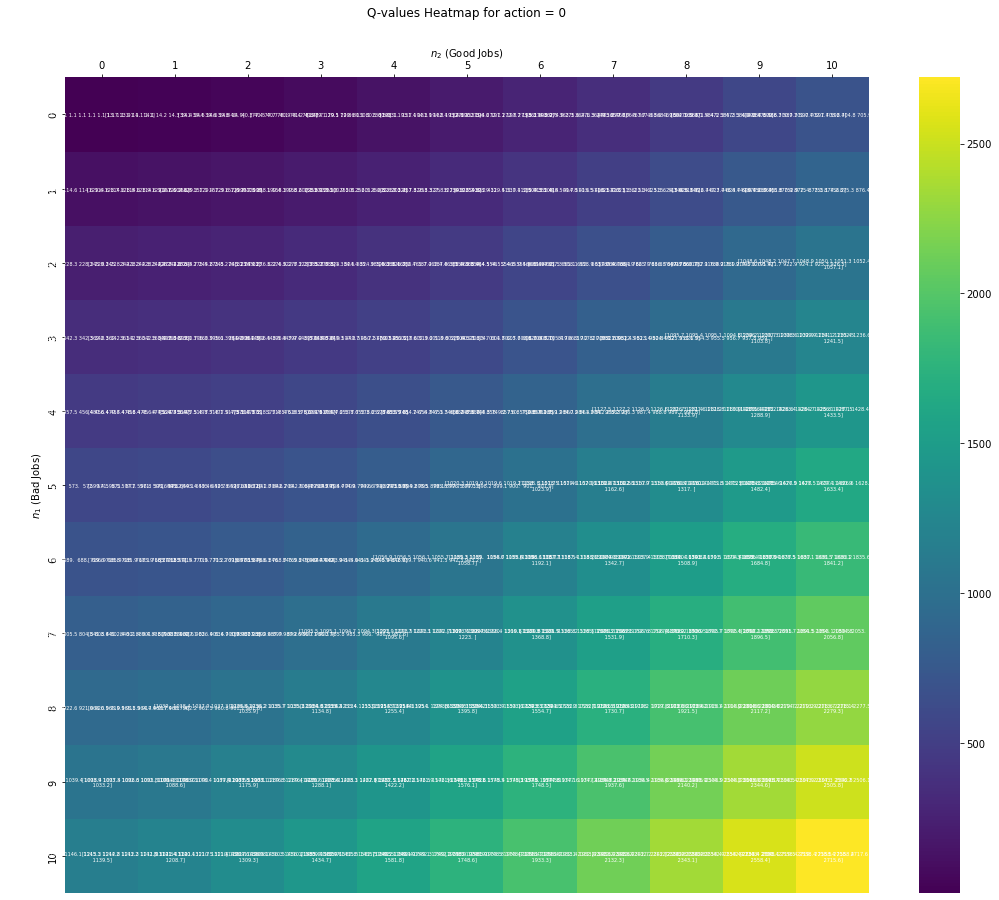

In [6]:
# Example usage for action k=0
plot_q_heatmap(bellman_relative_Q_optimal, cores, action = 0)

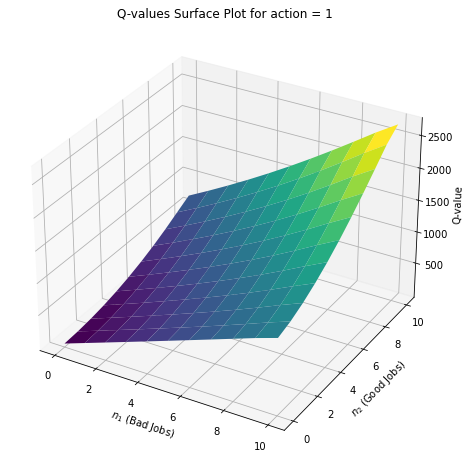

In [7]:
# Example usage for action k=0
plot_q_surface(bellman_relative_Q_optimal, cores, action = 1)

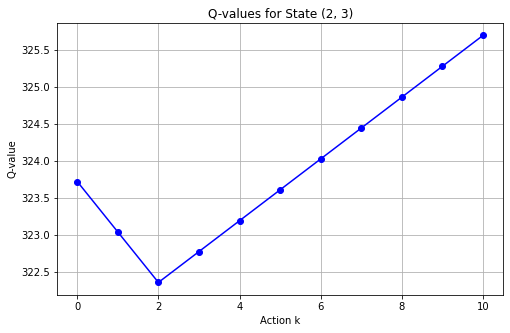

In [8]:
# Example usage for state (i=5, j=5)
plot_q_vs_actions(bellman_relative_Q_optimal, state = [2, 3])